In [9]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, roc_auc_score, confusion_matrix
import seaborn as sns
import shap


d:\fraud\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

model = joblib.load("final_fraud_model_lgbm.pkl")


In [11]:
test_preds = model.predict_proba(X_test)[:, 1]


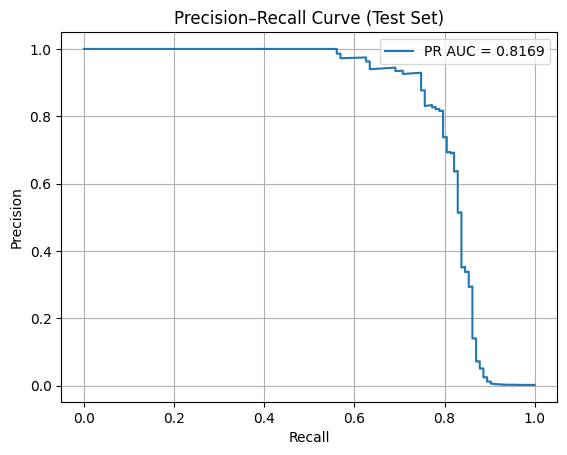

In [12]:
precision, recall, _ = precision_recall_curve(y_test, test_preds)
pr_auc = average_precision_score(y_test, test_preds)

plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Test Set)")
plt.grid()
plt.legend()
plt.show()


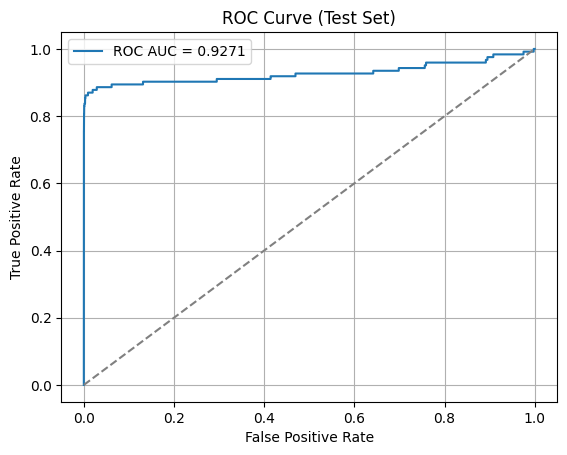

In [13]:
fpr, tpr, _ = roc_curve(y_test, test_preds)
roc_auc = roc_auc_score(y_test, test_preds)

plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.grid()
plt.legend()
plt.show()


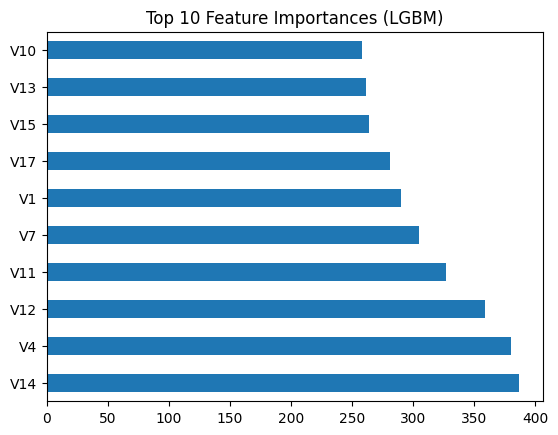

In [14]:
importances = pd.Series(model.feature_importances_, index=X_test.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (LGBM)")
plt.show()


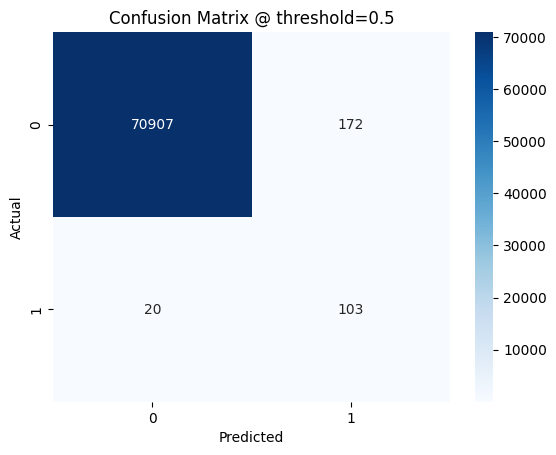

In [15]:
threshold = 0.5  
y_pred_label = (test_preds >= threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_label)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix @ threshold={threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


d:\fraud\venv\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


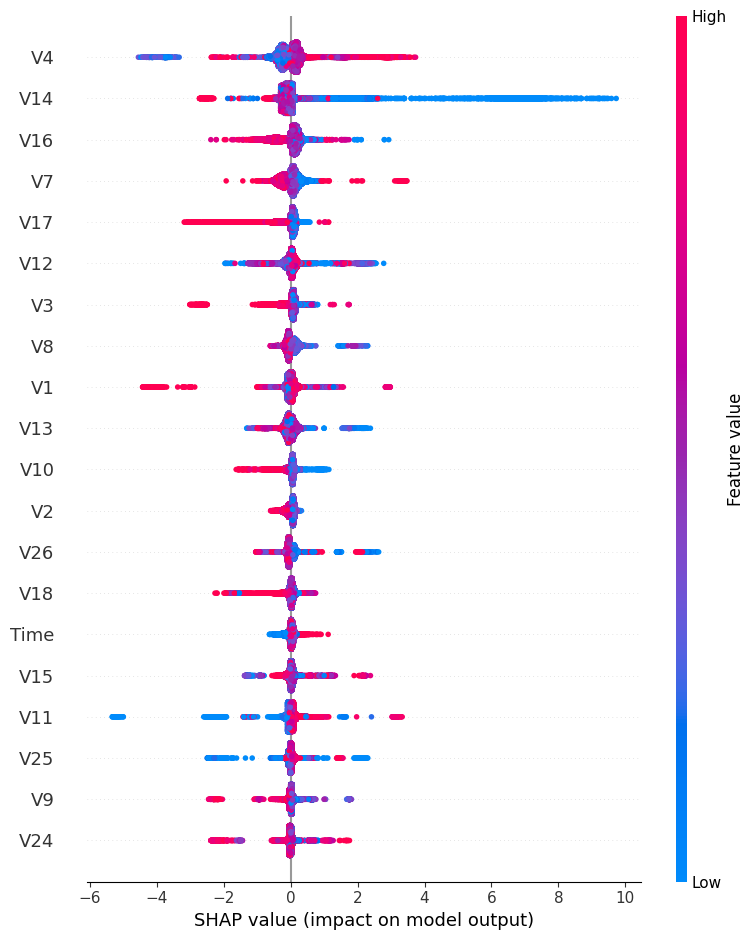

In [17]:
shap.summary_plot(shap_values, X_test)


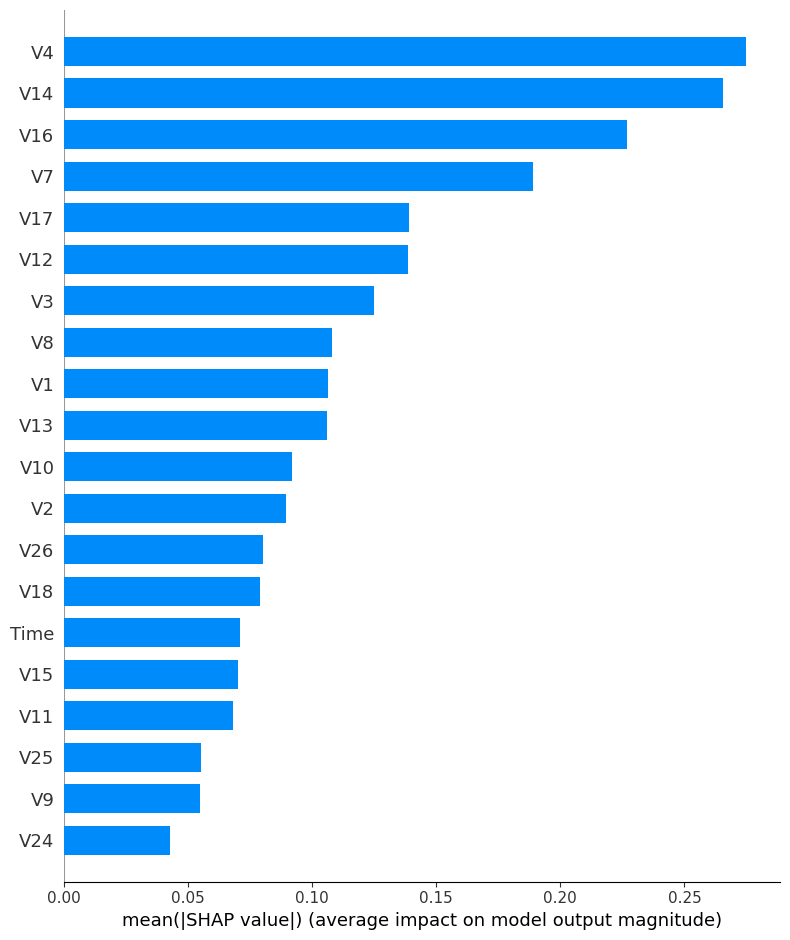

In [18]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])



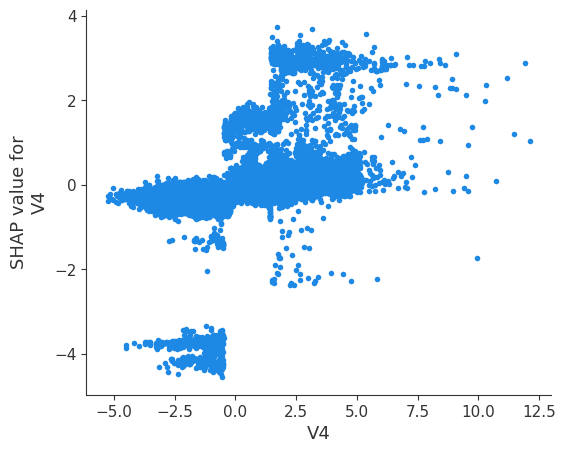

In [26]:
shap.dependence_plot("V4", shap_values, X_test, interaction_index=None)

